<a href="https://www.kaggle.com/code/dishaagarwal7001/bitly-data-from-usa-govt?scriptVersionId=208959336" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitly-usagov/example.txt


# Loading Data

In [2]:
path ='/kaggle/input/bitly-usagov/example.txt'
with open(path) as f:
    line = f.readline()
    
import json
with open(path) as f:
    result = [json.loads(line) for line in f]
result[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

# Calculating top timezones of the Sample Data

In [3]:
data = pd.DataFrame(result)
data.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [4]:
data['tz'] = data['tz'].fillna('Missing')
data[data['tz'] == ''] = 'Unknown'
val = pd.Series(data['tz'].value_counts())
subset_data = val[:7]

/tmp/ipykernel_18/218361916.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data[data['tz'] == ''] = 'Unknown'


# Graph for the top time zones

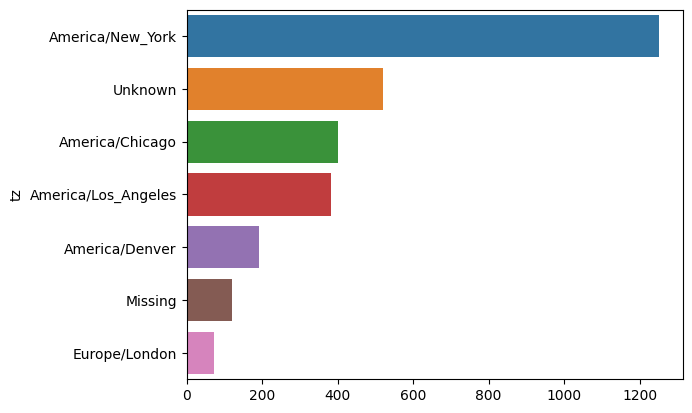

In [5]:
import seaborn as sns
sns.barplot(x = subset_data.to_numpy(), y = subset_data.index)
sns.set_style('whitegrid')
sns.set_palette('Greys_r')

# Top time zones by Windows and non-Windows users


In [6]:
a_data = data[data['a'].notna()].copy()
a_data['os'] = pd.Series(np.where(a_data['a'].str.contains('Windows'),'WindowsHaiBhai','WindowNiHai'))
a_data.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw,os
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1331923247.0,1331822918.0,Danvers,"[42.576698, -70.954903]",NaN,NaN,WindowsHaiBhai
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1331923249.0,1308262393.0,Provo,"[40.218102, -111.613297]",NaN,NaN,WindowNiHai
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1331923250.0,1331919941.0,Washington,"[38.9007, -77.043098]",NaN,NaN,WindowsHaiBhai
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1331923249.0,1331923068.0,Braz,"[-23.549999, -46.616699]",NaN,NaN,WindowNiHai
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1331923251.0,1273672411.0,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN,WindowsHaiBhai


In [7]:
df = a_data.groupby(['tz','os']).size().unstack().fillna(0)
ind_index = df.sum('columns').argsort()
final = df.take(ind_index)[-10:]
final

os,WindowNiHai,WindowsHaiBhai
tz,,
America/Sao_Paulo,15.0,18.0
Europe/Madrid,16.0,18.0
Pacific/Honolulu,15.0,20.0
Asia/Tokyo,16.0,21.0
Europe/London,35.0,37.0
America/Denver,75.0,106.0
America/Los_Angeles,150.0,219.0
America/Chicago,159.0,221.0
Unknown,233.0,263.0


In [8]:
d_graph = final.stack().reset_index()
d_graph.rename(columns = {0:'Total'}, inplace ='True')
d_graph.head(10)

,tz,os,Total
0,America/Sao_Paulo,WindowNiHai,15.0
1,America/Sao_Paulo,WindowsHaiBhai,18.0
2,Europe/Madrid,WindowNiHai,16.0
3,Europe/Madrid,WindowsHaiBhai,18.0
4,Pacific/Honolulu,WindowNiHai,15.0
5,Pacific/Honolulu,WindowsHaiBhai,20.0
6,Asia/Tokyo,WindowNiHai,16.0
7,Asia/Tokyo,WindowsHaiBhai,21.0
8,Europe/London,WindowNiHai,35.0
9,Europe/London,WindowsHaiBhai,37.0


<Axes: xlabel='Total', ylabel='tz'>

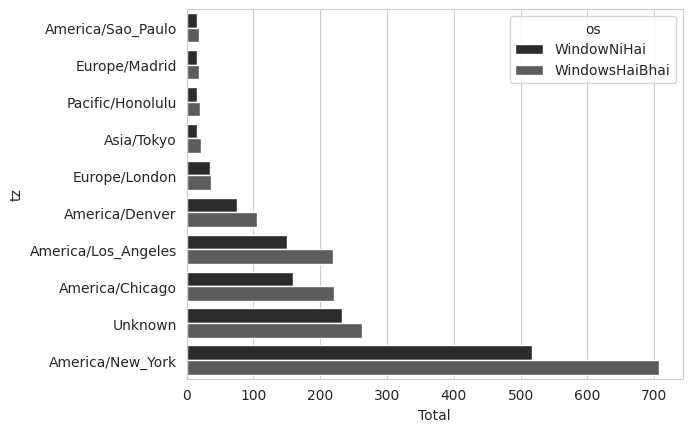

In [9]:
sns.barplot(x='Total', y = 'tz', data = d_graph, hue = 'os')

# Top devices used for URL shortening 

In [10]:
dev = list(a_data['a'])
splitted = [x.split()[0] for x in dev]
subset_data = pd.Series(splitted).value_counts().nlargest(5)
subset_data

Mozilla/5.0               2161
Mozilla/4.0                556
Unknown                    521
GoogleMaps/RochesterNY     121
TEST_INTERNET_AGENT         24
Name: count, dtype: int64

<Axes: >

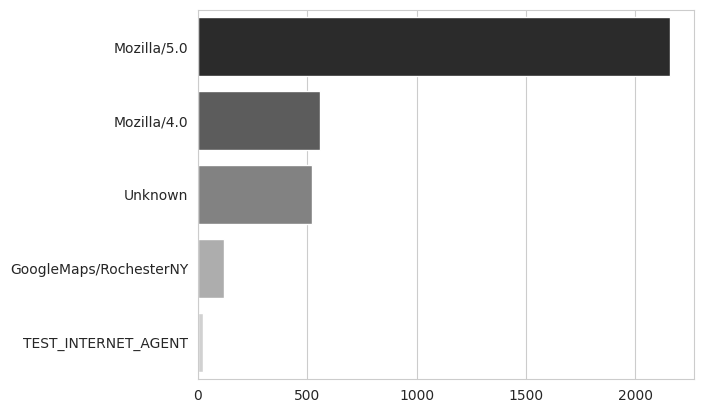

In [11]:
sns.barplot(x=subset_data.to_numpy(), y= subset_data.index)